In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathh="/workspaces/Hausdorff_morphological/csvResD.csv"
df= pd.read_csv(pathh)

In [2]:
df.columns

Index(['Unnamed: 0', 'hdToTestRobustTime', 'hdToTestTime',
       'avSurfDistToTestTime', 'myRobustHdTime', 'myHdTime', 'mymedianHdTime',
       'olivieraTime', 'hdToTestRobustValue', 'hdToTestValue',
       'myRobustHdValue', 'myHdValue', 'mymeanHdValue', 'olivieraValue',
       'avSurfDistToTestValue', 'hdToTestValue ', 'sitk_average_value',
       'sitk_hd_value', 'bench_sitk_time', 'WIDTH', 'HEIGHT', 'DEPTH', 'noise',
       'distortion', 'translations'],
      dtype='object')

In [6]:
hdToTestRobustTime= df['hdToTestRobustTime'].to_numpy()
myRobustHdTime= df['myRobustHdTime'].to_numpy()

olivieraTime= df['olivieraTime'].to_numpy()
myHdTime= df['myHdTime'].to_numpy()

bench_sitk_time= df['bench_sitk_time'].to_numpy()
mymedianHdTime= df['mymedianHdTime'].to_numpy()


In [7]:

my = [np.mean(myRobustHdTime), np.mean(myHdTime), np.mean(mymedianHdTime)]
my_error = [np.std(myRobustHdTime), np.std(myHdTime), np.std(mymedianHdTime)]

their = [np.mean(hdToTestRobustTime), np.mean(olivieraTime), np.mean(bench_sitk_time)]
their_error = [np.std(hdToTestRobustTime), np.std(olivieraTime), np.std(bench_sitk_time)]

# my=np.log10(my)
# my_error=np.log10(my_error)
# their=np.log10(their)
# their_error=np.log10(their_error)

print(f" my {my} \n  my_error {my_error} \n their {their} \n their_error {their_error} ")


 my [0.028135671518409913, 0.035382405851974115, 0.05517926437047475] 
  my_error [0.01966552681013445, 0.019956555668185532, 0.06022946201119205] 
 their [29.131927883222396, 0.3827913804814815, 13.117581374592689] 
 their_error [27.336256077786583, 0.2809537529577262, 2.5699455635748225] 


In [9]:
np.array(their)/np.array(my)

array([1035.40901322,   10.81869283,  237.72664468])

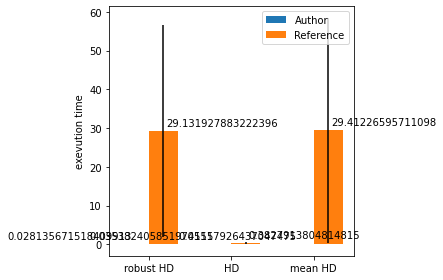

In [5]:


men_means, men_std = my, my_error
women_means, women_std = their, their_error

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Author')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label='Reference')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('exevution time')
ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(('robust HD', 'HD', 'mean HD'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    adapted from https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()